In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn import set_config
set_config(display='diagram')

## Computing cross-validated metrics

In [4]:
data = load_iris()

In [22]:
pd.DataFrame(data.data, columns=data.feature_names).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [27]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [29]:
clf = SVC().fit(data.data, data.target)

In [33]:
cv = cross_val_score(clf, data.data, data.target, cv=5)

In [37]:
print(f"Accuracy is {np.mean(cv):0.2f} with standard deviation {np.std(cv):0.2f}")

Accuracy is 0.97 with standard deviation 0.02


In [43]:
scores = cross_val_score(clf, data.data, data.target, cv=5, scoring='f1_macro')

In [45]:
print(f"Accuracy is {np.mean(cv):0.2f} with standard deviation {np.std(cv):0.2f}")

Accuracy is 0.97 with standard deviation 0.02


In [49]:
from sklearn.model_selection import ShuffleSplit
n_samples = data.data.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cv1 = cross_val_score(clf,data.data, data.target, cv=cv)

In [51]:
print(f"Accuracy is {np.mean(cv1):0.2f} with standard deviation {np.std(cv1):0.2f}")

Accuracy is 0.96 with standard deviation 0.03


## The cross_validate function and multiple metric evaluation

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']

In [57]:
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, data.data, data.target, scoring=scoring)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [63]:
scores['test_precision_macro'].mean()

0.9818181818181818

In [65]:
scores = cross_validate(clf, data.data, data.target,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)

In [70]:
pd.DataFrame(scores.values(), scores.keys()).T

,fit_time,score_time,estimator,test_score
0,0.001858,0.002067,"SVC(C=1, kernel='linear', random_state=0)",0.969697
1,0.002542,0.001829,"SVC(C=1, kernel='linear', random_state=0)",1.0
2,0.002688,0.002445,"SVC(C=1, kernel='linear', random_state=0)",0.969697
3,0.001323,0.001879,"SVC(C=1, kernel='linear', random_state=0)",0.969697
4,0.003422,0.003694,"SVC(C=1, kernel='linear', random_state=0)",1.0


<AxesSubplot:>

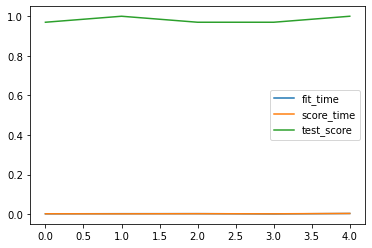

In [72]:
pd.DataFrame(scores.values(), scores.keys()).T.plot()